<a href="https://colab.research.google.com/github/saikiran-18/-Cricket-Player-Performance-Analysis/blob/main/Cricket_Player_Performance_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving IPL dataset final.csv to IPL dataset final.csv


#1. Loading and Inspecting the Data

---



Code for uploading a file (IPL dataset final.csv)

Code to load the CSV file into a pandas DataFrame and display the first 5 rows

Code to display the DataFrame info (df.info())

In [3]:
#1.Loading and Inspecting the Data
import pandas as pd
df = pd.read_csv('IPL dataset final.csv')
df.head()

,Player,COUNTRY,TEAM,AGE,CAPTAINCY EXP,Paying_Role,Mat,Inns,Runs,BF,...,B_TBalls,B_TRuns,B_TMaidens,B_TWkts,B_TAvg,B_TEcon,B_TSR,B_T4w,B_T5w,SOLD_PRICE
0,Ruturaj Gaikwad,IND,CSK,26,0,Batting,36,36.0,1207.0,926.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6cr
1,Shivam Dube,IND,CSK,29,0,All rounder,35,33.0,688.0,516.0,...,129.0,216.0,0.0,5.0,43.20,10.05,25.80,0.0,0.0,4cr
2,Ambati Rayudu,IND,CSK,37,0,Batting,188,175.0,4190.0,3296.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.75cr
3,Devon Conway,NZ,CSK,31,0,Batting,7,7.0,252.0,173.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1cr
4,Moeen Ali,ENG,CSK,35,0,All rounder,44,42.0,910.0,632.0,...,829.0,1145.0,1.0,42.0,27.26,8.29,19.74,0.0,0.0,8cr


In [4]:
#info check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 53 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         182 non-null    object 
 1   COUNTRY        182 non-null    object 
 2   TEAM           182 non-null    object 
 3   AGE            182 non-null    int64  
 4   CAPTAINCY EXP  182 non-null    int64  
 5   Paying_Role    182 non-null    object 
 6   Mat            182 non-null    int64  
 7   Inns           125 non-null    float64
 8   Runs           125 non-null    float64
 9   BF             125 non-null    float64
 10  HS             125 non-null    float64
 11  Avg            126 non-null    object 
 12  SR             125 non-null    float64
 13  NO             125 non-null    float64
 14  4s             125 non-null    float64
 15  6s             125 non-null    float64
 16  0s             124 non-null    float64
 17  50s            124 non-null    float64
 18  100s      

In [5]:
print(df.Avg)

0      37.72
1      24.57
2       28.9
3         42
4      23.33
       ...  
177    14.12
178      NaN
179      NaN
180     17.5
181      NaN
Name: Avg, Length: 182, dtype: object


#2. Cleaning and Preparing the Data

---



Code for data cleaning: converting the 'Avg' column to a numeric type.

Code to display the 'Avg' column to verify the conversion.

Code for data cleaning: defining a function to convert SOLD_PRICE to numeric (in INR).

Code to apply the function to create a new SOLD_PRICE_INR column.

In [6]:
#2.Cleaning and Preparing the Data
#data cleaning 1
df['Avg']= pd.to_numeric(df['Avg'], errors= 'coerce')

In [7]:
df.Avg

,Avg
0,37.72
1,24.57
2,28.90
3,42.00
4,23.33
...,...
177,14.12
178,NaN
179,NaN
180,17.50


In [8]:
#data cleaning 2
def convert_price_into_numeric(price_str):
  if isinstance(price_str, str):
    if 'cr' in price_str:
      price_str = price_str.replace('cr',' ')
      return (float(price_str))*10000000
    elif 'l' in price_str:
      price_str = price_str.replace('l',' ')
      return (float(price_str))*100000
    return price_str
df['SOLD_PRICE_INR'] = df['SOLD_PRICE'].apply(convert_price_into_numeric)

In [9]:
df.SOLD_PRICE_INR

,SOLD_PRICE_INR
0,60000000.0
1,40000000.0
2,67500000.0
3,10000000.0
4,80000000.0
...,...
177,40000000.0
178,40000000.0
179,5000000.0
180,2000000.0


#3. Analyzing the Data and visualizing the data

---

##1: Finding Top Batsmen with a High Strike Rate

---



Code to filter and sort batsmen by strike rate.

Code to create and display a bar chart of the top 10 batsmen by strike rate.


Top 10 Batsman by Strike Rate
                Player    Avg    Runs      SR
114      Jitesh Sharma  29.25   234.0  163.64
115  Bhanuka Rajapaksa  22.89   206.0  159.69
148    Shimron Hetmyer  30.78   831.0  152.20
166    Nicholas Pooran  26.06   912.0  151.24
145        Jos Buttler  39.87  2831.0  149.71
22       Rovman Powell  25.00   250.0  149.70
19        Rishabh Pant  34.61  2338.0  147.97
20        Prithvi Shaw  25.21  1588.0  147.45
3         Devon Conway  42.00   252.0  145.66
132      Rajat Patidar  40.40   404.0  144.29


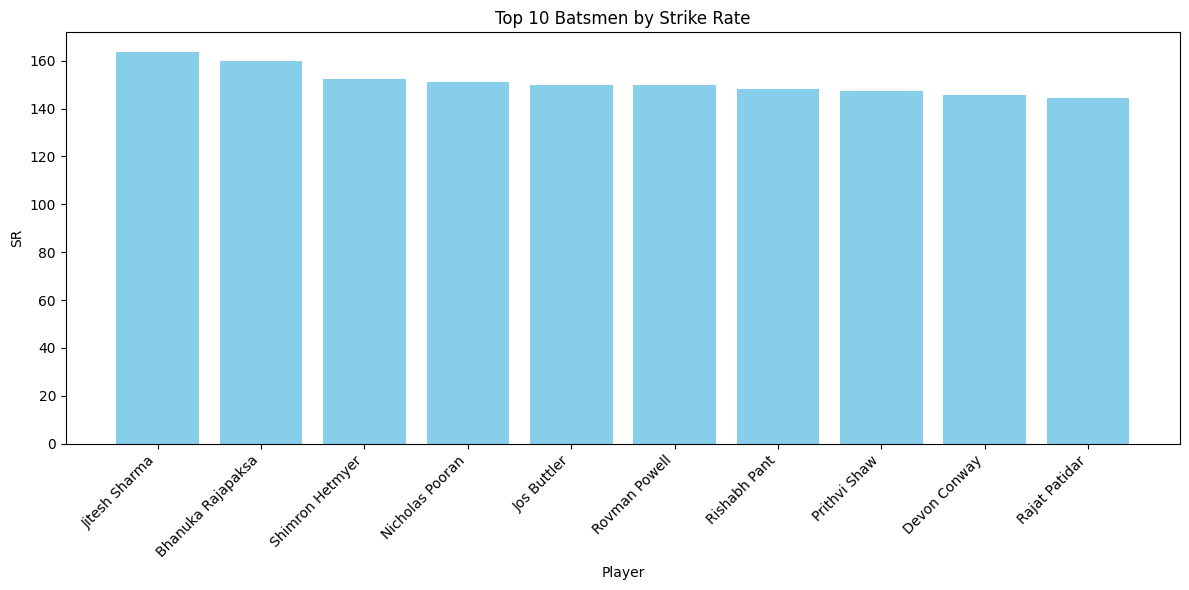

In [10]:
# 3.Analyzing the Data and visualizing the data
#1:Finding Top Batsmen with a High Strike Rate

batting_df = df[df['Paying_Role'] == 'Batting'].copy()
batting_df.dropna(subset=['Inns','Runs','SR'], inplace=True)
highest_sr_batsmen = batting_df[batting_df['Runs']>=200].copy()
highest_sr_batsmen.sort_values(by='SR', ascending=False, inplace=True)
print("Top 10 Batsman by Strike Rate")
print(highest_sr_batsmen.head(10)[['Player','Avg','Runs','SR']])

import matplotlib.pyplot as plt

top_10_sr_batsmen = highest_sr_batsmen.sort_values(by='SR', ascending=False).head(10)


plt.figure(figsize=(12, 6))
plt.bar(top_10_sr_batsmen['Player'], top_10_sr_batsmen['SR'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('SR')
plt.title('Top 10 Batsmen by Strike Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



###Insights
Here are the key insights derived from the visualization:

-Jitesh Sharma leads the pack with a strike rate of over 160.

-The top three batsmen—Jitesh Sharma, Bhanuka Rajapaksa, and Shimron Hetmyer—all have a strike rate above 150.

-Jos Buttler, despite being a highly-regarded batsman, sits fifth on this list, with a strike rate close to 150.

##2: Finding Top Batsmen with a Average

---



Code to filter and sort batsmen by batting average.

Code to create and display a bar chart of the top 10 batsmen by batting average.

Top 10 Batsman by Average
              Player    Avg    Runs      SR
73         K L Rahul  48.01  3889.0  136.22
18      David Warner  42.01  5881.0  140.69
165    Aiden Markram  40.54   527.0  134.10
132    Rajat Patidar  40.40   404.0  144.29
145      Jos Buttler  39.87  2831.0  149.71
5           MS Dhoni  39.20  4978.0  135.20
0    Ruturaj Gaikwad  37.72  1207.0  130.35
37      David Miller  36.64  2455.0  137.69
167  Kane Williamson  36.22  2101.0  126.03
131      Virat Kohli  36.20  6624.0  129.15


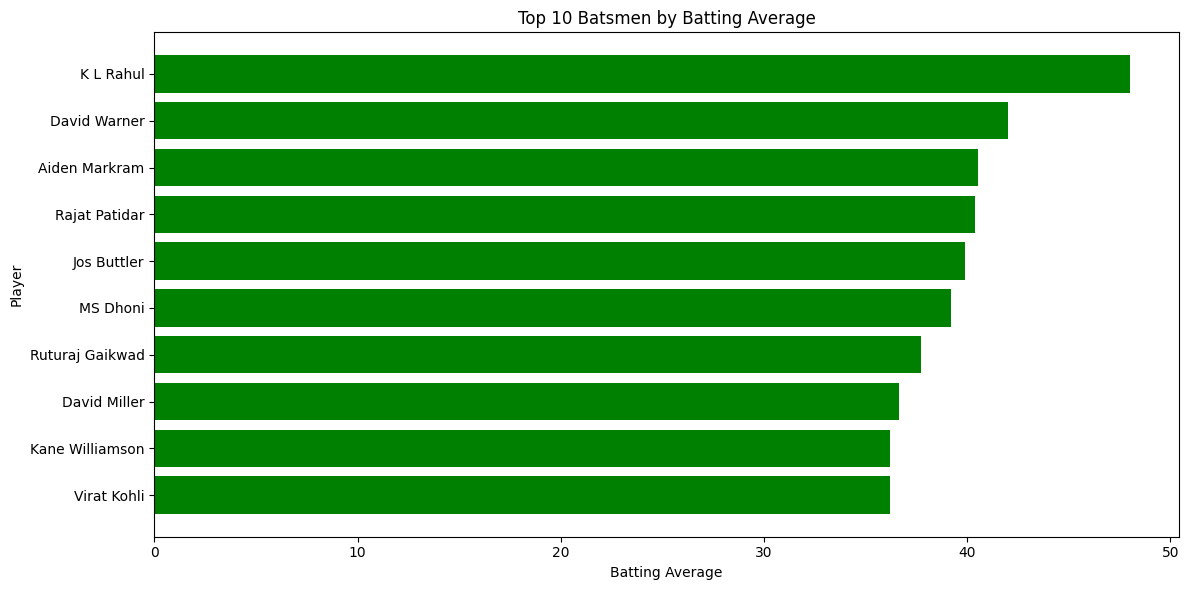

In [15]:
#2:Finding Top Batsmen with a Average

avg_df = df[df['Paying_Role'].isin(['Batting','All rounder'])].copy()
avg_df.dropna(subset=['Inns','Runs','Avg'],inplace=True)
highest_avg_batsmen=avg_df[avg_df['Inns']>=10].copy()
highest_avg_batsmen.sort_values(by='Avg', ascending=False, inplace=True)
print("Top 10 Batsman by Average")
print(highest_avg_batsmen.head(10)[['Player','Avg','Runs','SR']])

import matplotlib.pyplot as plt


top_avg_batsmen = highest_avg_batsmen.head(10)


plt.figure(figsize=(12, 6))
plt.barh(top_avg_batsmen['Player'], top_avg_batsmen['Avg'], color='green')
plt.xlabel('Batting Average')
plt.ylabel('Player')
plt.title('Top 10 Batsmen by Batting Average')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Insights
-K L Rahul stands out as the most consistent batsman, with a batting average significantly higher than all other players on the list.

-David Warner is a clear second, but there is a notable gap between his average and K L Rahul's.

##3: Finding Top Batsmen with a consistency_score

---



Code to filter batsmen and calculate a custom consistency_score.

Code to sort players by the new score.

Code to create and display a bar chart of the top 10 batsmen by consistency score.

Top 10 Batsman by Consistency
              Player    Avg    Runs      SR  consistency_score
18      David Warner  42.01  5881.0  140.69             38.305
73         K L Rahul  48.01  3889.0  136.22             34.105
131      Virat Kohli  36.20  6624.0  129.15             32.300
111   Shikhar Dhawan  34.88  6243.0  126.33             31.940
93      Rohit Sharma  30.30  5879.0  129.89             27.350
5           MS Dhoni  39.20  4978.0  135.20             26.800
145      Jos Buttler  39.87  2831.0  149.71             25.435
130   Faf Du Plessis  34.37  3403.0  130.58             24.685
59    Ajinkya Rahane  30.86  4074.0  120.68             24.230
167  Kane Williamson  36.22  2101.0  126.03             23.510


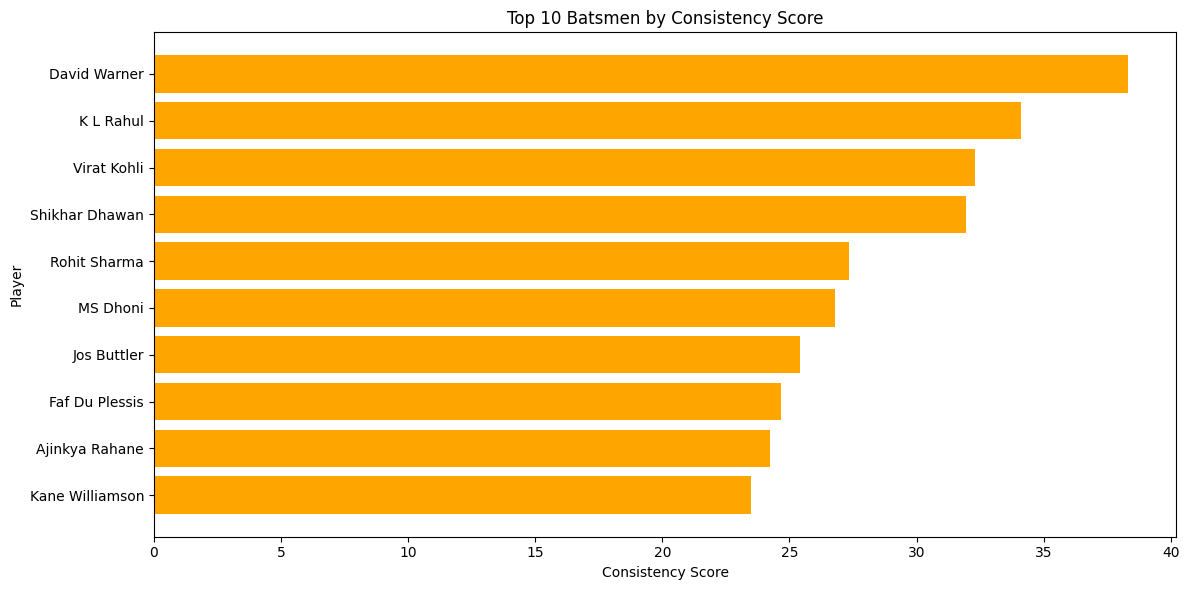

In [17]:
#3:Finding Top Batsmen with a consistency_score

cons_df=df[df['Paying_Role'] == 'Batting'].copy()
cons_df.dropna(subset=['Player','Inns','Runs','Avg','50s','100s'],inplace=True)
highest_cons_player=cons_df[cons_df['Inns']>=15].copy()
highest_cons_player['consistency_score']=(
    highest_cons_player['Avg']*0.5+
    highest_cons_player['50s']*0.3+
    highest_cons_player['100s']*0.2
    )
most_consistent_player=highest_cons_player.sort_values(by='consistency_score',ascending=False).head(10)
print("Top 10 Batsman by Consistency")
print(most_consistent_player[['Player','Avg','Runs','SR','consistency_score']])

import matplotlib.pyplot as plt

most_consistent_player = highest_cons_player.sort_values(
    by='consistency_score', ascending=False
).head(10)

# Create a horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(most_consistent_player['Player'], most_consistent_player['consistency_score'], color='orange')
plt.xlabel('Consistency Score')
plt.ylabel('Player')
plt.title('Top 10 Batsmen by Consistency Score')
plt.gca().invert_yaxis()
plt.tight_layout()

###Insights
-David Warner is the most consistent batsman, with a score that is noticeably higher than the rest of the players on the list.

-K L Rahul holds the second spot, but there is a distinct gap between his score and the leader, David Warner.

-Virat Kohli and Shikhar Dhawan are in the third and fourth positions, respectively, and their scores are very close to each other.

##4: Finding Top Bowlers with a Low Economy Rate

---



Code to filter and sort bowlers by economy rate.

Code to create and display a bar chart of the top 10 bowlers by economy rate.

Top 10 Bowlers by Economy Rate
                  Player   Inns  B_Wkts  B_Econ
43           Rashid Khan   43.0   112.0    6.38
60          Sunil Narine   86.0   152.0    6.63
4              Moeen Ali   42.0    24.0    6.79
10      Mitchell Santner    6.0    10.0    6.92
150  Ravichandran Ashwin   75.0   157.0    6.98
168    Washington Sundar   33.0    33.0    7.23
23            Axar Patel   88.0   101.0    7.25
76         Krunal Pandya   85.0    61.0    7.31
6        Ravindra Jadeja  161.0   132.0    7.61
140    Wanindu Hasaranga    9.0    26.0    7.78


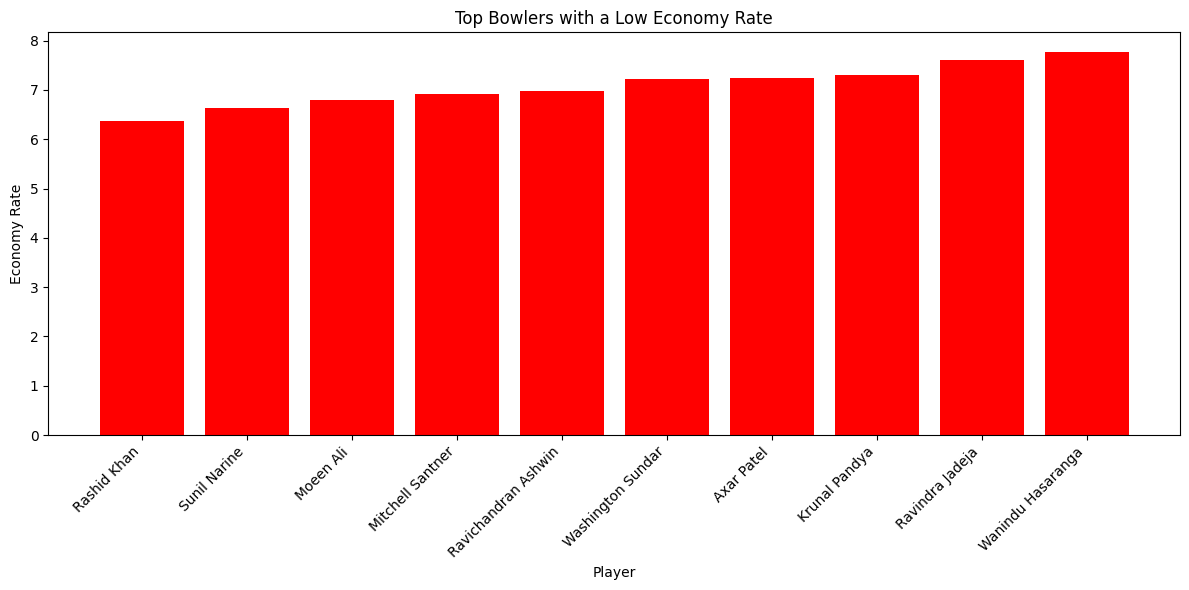

In [20]:
#4: Finding Top Bowlers with a Low Economy Rate

bowling_df = df[df['Paying_Role'].isin(['Bowling','All rounder'])].copy()
bowling_df.dropna(subset=['B_Econ','Inns','B_Wkts'], inplace=True)
min_wicket_bowler=bowling_df[bowling_df['B_Wkts']>=10].copy()
top_bowlers=min_wicket_bowler.sort_values(by='B_Econ', ascending=True)
print("Top 10 Bowlers by Economy Rate")
print(top_bowlers.head(10)[['Player','Inns','B_Wkts','B_Econ']])


top_bowl_ls = top_bowlers.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_bowl_ls['Player'], top_bowl_ls['B_Econ'], color='red')
plt.xlabel('Player')
plt.ylabel('Economy Rate')
plt.title('Top Bowlers with a Low Economy Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Insights
-Rashid Khan is the most economical bowler in the list with an impressive economy rate of just 6.38, highlighting his ability to consistently restrict runs.

-The top three bowlers, Rashid Khan, Sunil Narine, and Moeen Ali, all maintain a strong economy rate below 7.0, showcasing their exceptional control.

-The list includes a mix of dedicated bowlers and all-rounders, such as Ravindra Jadeja and Moeen Ali, who demonstrate their value not only with the bat but also by keeping the runs down.